# REGRESSION MODEL

## IMPORT PACKAGES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

import pickle

## IMPORT DATA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Project path

In [4]:
root = '/content/drive/MyDrive/02_RETAIL'

Data file names.

Load data.

In [5]:
name_x = 'x_preselected.pickle'
name_y = 'y_preselected.pickle'

In [6]:
x = pd.read_pickle(root + '/02_Data/03_Work/' + name_x)
y = pd.read_pickle(root + '/02_Data/03_Work/' + name_y)

## MODEL FOR PRODUCT

In [7]:
x = x.loc[(x.store_id == 'CA_3') & (x.item_id == 'FOODS_3_586')]

In [8]:
x

,date,store_id,item_id,sales_mm_8,sales_mm_6,sales_mm_7,sales_mm_9,sales_mm_10,sales_mm_2,sales_mm_3,...,sell_price_lag_5,sell_price_lag_6,stock_break_3_lag_1,stock_break_7_lag_1,stock_break_15_lag_1,month_te,weekday_te,year_te,weekday_Wednesday,month_1
7343,2013-01-16,CA_3,FOODS_3_586,9.12,9.33,9.14,9.33,9.10,11.50,8.33,...,1.48,1.48,0.00,0.00,0.00,25.39,24.89,29.95,1.00,1.00
7344,2013-01-17,CA_3,FOODS_3_586,8.75,8.17,8.86,8.78,9.00,9.00,9.67,...,1.48,1.48,0.00,0.00,0.00,25.39,26.10,29.95,0.00,1.00
7345,2013-01-18,CA_3,FOODS_3_586,9.38,9.17,8.86,9.22,9.20,9.50,10.33,...,1.48,1.48,0.00,0.00,0.00,25.39,29.48,29.95,0.00,1.00
7346,2013-01-19,CA_3,FOODS_3_586,8.75,8.67,9.00,9.22,9.10,10.50,9.00,...,1.48,1.48,0.00,0.00,0.00,25.39,34.80,29.95,0.00,1.00
7347,2013-01-20,CA_3,FOODS_3_586,9.50,10.50,9.29,9.22,9.60,10.50,11.33,...,1.48,1.48,0.00,0.00,0.00,25.39,34.39,29.95,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,2015-11-26,CA_3,FOODS_3_586,7.38,6.83,7.00,7.11,7.10,5.00,6.00,...,1.58,1.58,0.00,0.00,0.00,28.13,26.10,28.16,0.00,0.00
8388,2015-11-27,CA_3,FOODS_3_586,7.88,8.50,7.86,8.11,7.80,9.50,8.00,...,1.58,1.58,0.00,0.00,0.00,28.13,29.48,28.16,0.00,0.00
8389,2015-11-28,CA_3,FOODS_3_586,8.12,8.50,8.71,8.11,8.30,12.00,9.67,...,1.58,1.58,0.00,0.00,0.00,28.13,34.80,28.16,0.00,0.00
8390,2015-11-29,CA_3,FOODS_3_586,8.38,8.00,8.14,7.89,7.90,8.00,10.00,...,1.58,1.58,0.00,0.00,0.00,28.13,34.39,28.16,0.00,0.00


In [9]:
y = y[y.index.isin(x.index)]

### MODEL

#### Define model variables

In [10]:
var_model = x.columns.to_list()[3:]

#### Define validation

In [11]:
time_cv = TimeSeriesSplit(3, test_size = 8)

#### Create the pipe and dictionary of algorithms, parameters and values to test

We can modify to leave the algorithms we want to test.

Modify the parameters.

In [12]:
pipe = Pipeline([('algorithm',HistGradientBoostingRegressor())])

grid = [   {'algorithm': [HistGradientBoostingRegressor()]
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_iter': [50,100,200],
#          'algoritmo__max_depth': [5,10,20],
#          'algoritmo__min_samples_leaf': [500],
#          'algoritmo__scoring': ['neg_mean_absolute_error'],
#          'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]
           }
       ]

#### Optimizar los hiper parámetros

#####  Con random search

In [13]:
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid,
                                   n_iter = 1,
                                   cv = time_cv,
                                   scoring = 'neg_mean_absolute_error',
                                   verbose = 0,
                                   n_jobs = -1)

model = random_search.fit(x[var_model],y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.56,0.52,0.01,0.00,HistGradientBoostingRegressor(),{'algorithm': HistGradientBoostingRegressor()},-4.78,-1.91,-3.86,-3.52,1.19,1


In [14]:
final_model = model.best_estimator_.fit(x[var_model],y)

In [15]:
prediction = final_model.predict(x[var_model])

In [16]:
temp = pd.concat([x.date.reset_index(drop=True),y.reset_index(drop=True),pd.Series(prediction,name = 'prediction')],axis = 1).set_index('date')

In [17]:
temp

,sales,prediction
date,,
2013-01-16,6,6.64
2013-01-17,13,10.94
2013-01-18,8,10.16
2013-01-19,13,12.72
2013-01-20,13,11.50
...,...,...
2015-11-26,14,12.27
2015-11-27,10,10.07
2015-11-28,6,7.57


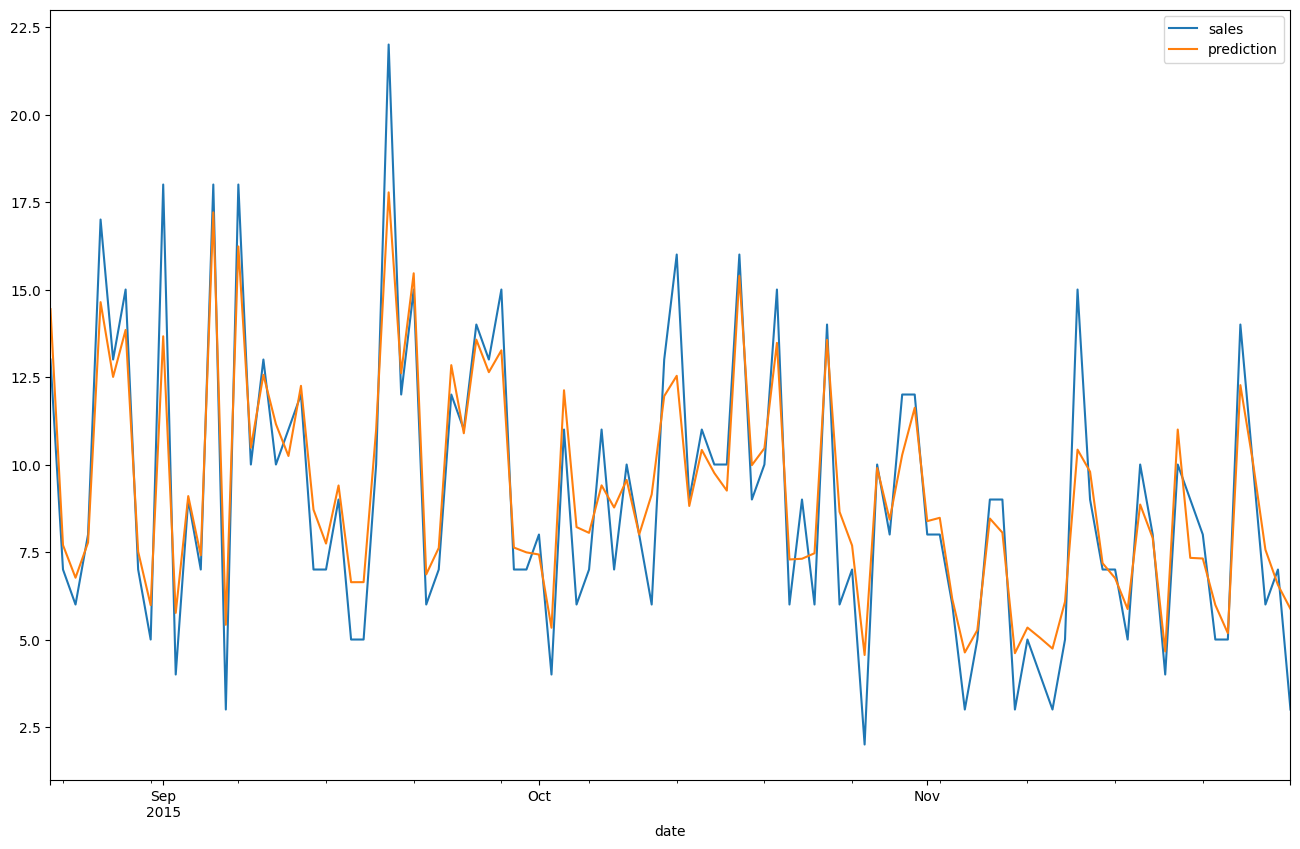

In [18]:
temp.tail(100).plot(figsize = (16,10));

## SCALE ALL THE PRODUCTS

### MODEL

We already have the process running to model a product.

Now we need to scale it to all combinations of stores and products.

First we are going to re-import the data.

In [19]:
name_x = 'x_preselected.pickle'
name_y = 'y_preselected.pickle'

In [20]:
x = pd.read_pickle(root + '/02_Data/03_Work/' + name_x)
y = pd.read_pickle(root + '/02_Data/03_Work/' + name_y)

We included the store-product combination as a new variable and removed the original ones.

In [21]:
x.insert(loc=0,column='product',value=x.store_id + '_'+ x.item_id)
x = x.drop(columns = ['store_id','item_id'])

In [22]:
x


,product,date,sales_mm_8,sales_mm_6,sales_mm_7,sales_mm_9,sales_mm_10,sales_mm_2,sales_mm_3,sales_mm_5,...,sell_price_lag_5,sell_price_lag_6,stock_break_3_lag_1,stock_break_7_lag_1,stock_break_15_lag_1,month_te,weekday_te,year_te,weekday_Wednesday,month_1
0,CA_3_FOODS_3_090,2013-01-16,233.38,242.50,236.00,228.33,232.50,182.00,215.00,242.00,...,1.25,1.25,0.00,0.00,0.00,25.39,24.89,29.95,1.00,1.00
1,CA_3_FOODS_3_090,2013-01-17,230.38,233.50,235.14,228.67,224.60,174.50,185.00,237.40,...,1.25,1.25,0.00,0.00,0.00,25.39,26.10,29.95,0.00,1.00
2,CA_3_FOODS_3_090,2013-01-18,227.00,226.17,224.43,223.67,222.80,180.50,173.00,201.20,...,1.25,1.25,0.00,0.00,0.00,25.39,29.48,29.95,0.00,1.00
3,CA_3_FOODS_3_090,2013-01-19,224.38,205.00,225.86,226.67,223.70,197.00,195.00,189.80,...,1.25,1.25,0.00,0.00,0.00,25.39,34.80,29.95,0.00,1.00
4,CA_3_FOODS_3_090,2013-01-20,242.88,218.50,227.43,239.67,240.20,293.00,252.00,221.00,...,1.25,1.25,0.00,0.00,0.00,25.39,34.39,29.95,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,CA_4_FOODS_3_714,2015-11-26,9.38,10.67,9.86,9.67,9.50,9.00,7.00,9.80,...,1.58,1.58,0.00,0.00,0.00,28.13,26.10,28.16,0.00,0.00
20976,CA_4_FOODS_3_714,2015-11-27,11.38,11.83,12.29,10.78,10.90,14.00,13.33,11.60,...,1.58,1.58,0.00,0.00,0.00,28.13,29.48,28.16,0.00,0.00
20977,CA_4_FOODS_3_714,2015-11-28,12.00,11.33,11.57,11.22,10.70,16.00,12.67,10.60,...,1.58,1.58,0.00,0.00,0.00,28.13,34.80,28.16,0.00,0.00
20978,CA_4_FOODS_3_714,2015-11-29,12.25,11.67,12.14,12.56,11.80,13.50,16.33,13.40,...,1.58,1.58,0.00,0.00,0.00,28.13,34.39,28.16,0.00,0.00


In order to apply the process on a recurring basis, we are going to create a list where each element is the data of each product.

In [23]:
products = list(x.groupby("product"))

We encapsulate the individual modeling process in a function, which we will call in each product.

In [24]:
#Receives the data from x and y and every product

def modeling(x_product, y):

    #Excludes the product as a variable to model
    var_model = x_product.columns.to_list()[2:]

    #Define la validación cruzada
    time_cv = TimeSeriesSplit(3, test_size = 8)

    #Defines the algorithms grid
    pipe = Pipeline([('algorithm',HistGradientBoostingRegressor())])
    grid = [
         {'algorithm': [HistGradientBoostingRegressor()]
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_iter': [50,100,200],
#          'algoritmo__max_depth': [5,10,20,50],
#          'algoritmo__scoring': ['neg_mean_absolute_error'],
#          'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]
         }

    ]

    #Creates the models
    random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid,
                                   n_iter = 1,
                                   cv = time_cv,
                                   scoring = 'neg_mean_absolute_error',
                                   verbose = 0,
                                   n_jobs = -1)

    model = random_search.fit(x_product[var_model],y)

    #Retrains the best model over all the data
    final_model = model.best_estimator_.fit(x_product[var_model],y)

    #Returns final model as output
    return(final_model)

Create another empty list to save every trained model from every product

In [25]:
models_list = []

We iterate on each element of the products list and save the final model in the list.

In [26]:
for each in products:
    #Rename
    product = each[0]
    data = each[1]
    #Selects only the data of the target which corresponds to the product
    y_each = y[y.index.isin(data.index)]

    #call the function modeling
    model = modeling(data,y_each)
    #Adds the final model to the list
    models_list.append((product,model))


In [27]:
models_list

[('CA_3_FOODS_3_090',
  Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_120',
  Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_202',
  Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_252',
  Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_288',
  Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_329',
  Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_555',
  Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_586',
  Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_587',
  Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_714',
  Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])),
 ('CA_4_FOODS_3_090',
  Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])),

We check.

NOTE: The goal here is not to assess the quality of the model, since we are not using the training data.

It is simply to check that the process works well and we do not see anything strange before continuing.

In [29]:
df

,product,date,sales_mm_8,sales_mm_6,sales_mm_7,sales_mm_9,sales_mm_10,sales_mm_2,sales_mm_3,sales_mm_5,...,sell_price_lag_6,stock_break_3_lag_1,stock_break_7_lag_1,stock_break_15_lag_1,month_te,weekday_te,year_te,weekday_Wednesday,month_1,sales
0,CA_3_FOODS_3_090,2013-01-16,233.38,242.50,236.00,228.33,232.50,182.00,215.00,242.00,...,1.25,0.00,0.00,0.00,25.39,24.89,29.95,1.00,1.00,191
1,CA_3_FOODS_3_090,2013-01-17,230.38,233.50,235.14,228.67,224.60,174.50,185.00,237.40,...,1.25,0.00,0.00,0.00,25.39,26.10,29.95,0.00,1.00,170
2,CA_3_FOODS_3_090,2013-01-18,227.00,226.17,224.43,223.67,222.80,180.50,173.00,201.20,...,1.25,0.00,0.00,0.00,25.39,29.48,29.95,0.00,1.00,224
3,CA_3_FOODS_3_090,2013-01-19,224.38,205.00,225.86,226.67,223.70,197.00,195.00,189.80,...,1.25,0.00,0.00,0.00,25.39,34.80,29.95,0.00,1.00,362
4,CA_3_FOODS_3_090,2013-01-20,242.88,218.50,227.43,239.67,240.20,293.00,252.00,221.00,...,1.25,0.00,0.00,0.00,25.39,34.39,29.95,0.00,1.00,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,CA_4_FOODS_3_714,2015-11-26,9.38,10.67,9.86,9.67,9.50,9.00,7.00,9.80,...,1.58,0.00,0.00,0.00,28.13,26.10,28.16,0.00,0.00,22
20976,CA_4_FOODS_3_714,2015-11-27,11.38,11.83,12.29,10.78,10.90,14.00,13.33,11.60,...,1.58,0.00,0.00,0.00,28.13,29.48,28.16,0.00,0.00,10
20977,CA_4_FOODS_3_714,2015-11-28,12.00,11.33,11.57,11.22,10.70,16.00,12.67,10.60,...,1.58,0.00,0.00,0.00,28.13,34.80,28.16,0.00,0.00,17
20978,CA_4_FOODS_3_714,2015-11-29,12.25,11.67,12.14,12.56,11.80,13.50,16.33,13.40,...,1.58,0.00,0.00,0.00,28.13,34.39,28.16,0.00,0.00,7


In [31]:
#unificar el df para poder extraer los x e y de cada producto
df =  pd.concat([x,y],axis=1)

for each in range(0,len(models_list)):

    #Prepara los datos necesarios
    product = models_list[each][0]
    model = models_list[each][1]
    variables = model[0].feature_names_in_
    target = 'sales'

    x_prod = df.loc[df['product'] == product].drop(columns=target).copy()
    y_prod = df.loc[df['product'] == product,'sales'].copy()

    date = x_prod.date.values

    #Genera graficos de predicho vs real
    predictions = pd.DataFrame(data={'date': date,
                                      'product': product,
                                      'sales': y_prod,
                                      'prediction': model.predict(x_prod[variables])})

    predictions['prediction'] = predictions.prediction.astype('int')
    predictions.set_index('date',inplace=True)

    predictions.tail(100).plot(figsize = (16,8),title = product);

Output hidden; open in https://colab.research.google.com to view.